In [55]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
file_path = r'G:\Data Projects\Twitter Sentiment Analysis\Data\english_tweets.csv'
df = pd.read_csv(file_path, encoding='utf-8', engine='python')

In [36]:
df.columns

Index(['text'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156045 entries, 0 to 156044
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    156045 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [39]:
df.head()

,text
0,RT @__theSeyram: There you go😮‍💨 https://t.co/...
1,RT @4th_System: https://t.co/lXY0ed4XuI
2,RT @NezukoSocial: 🐱 Cat holding Power https://...
3,RT @TheYisusOne: Alright so I reworked Flygon'...
4,"Gosh, it's odd for someone to sign onto a Zoom..."


In [40]:
df.isnull().sum()

text    0
dtype: int64

In [41]:
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

RT @__theSeyram: There you go😮‍💨 https://t.co/86gIGmMtu5 

RT @4th_System: https://t.co/lXY0ed4XuI 

RT @NezukoSocial: 🐱 Cat holding Power https://t.co/xj1OOBIuyF 

RT @TheYisusOne: Alright so I reworked Flygon's animations so it stays grounded in battle.
I also made a better Sandstorm effect on Unity,… 

Gosh, it's odd for someone to sign onto a Zoom call wearing a mask. Cooties don't fit thru the Internet cable! 



In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
df['text'] = df['text'].str.replace('rt', '', case=False)

In [44]:
df

,text
0,@__theSeyram: There you go😮‍💨 https://t.co/86...
1,@4th_System: https://t.co/lXY0ed4XuI
2,@NezukoSocial: 🐱 Cat holding Power https://t....
3,@TheYisusOne: Alright so I reworked Flygon's ...
4,"Gosh, it's odd for someone to sign onto a Zoom..."
...,...
156040,@aiceia_lko: See complaint with evidence of t...
156041,@Chirolyn_1965: Chirolyn★Spring Tour 2023決定❕\...
156042,@liamarnoldsxx: Are you subscribed to my http...
156043,@maian_wallet GM


In [19]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [45]:
df.text = df['text'].apply(data_processing)

In [46]:
df

,text
0,__theseyram go
1,4th_system
2,nezukosocial cat holding power
3,theyisusone alright reworked flygons animation...
4,gosh odd someone sign onto zoom call wearing m...
...,...
156040,aiceia_lko see complaint evidence toll plaza o...
156041,chirolyn_1965 chirolynspring tour 2023決定 hide ...
156042,liamarnoldsxx subscribed page yet someone else...
156043,maian_wallet gm


In [47]:
df = df.drop_duplicates('text')

In [48]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [49]:
df['text'] = df['text'].apply(lambda x: stemming(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_13032\3236938048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: stemming(x))


In [50]:
df

,text
0,__theseyram go
1,4th_system
2,nezukosocial cat holding power
3,theyisusone alright reworked flygons animation...
4,gosh odd someone sign onto zoom call wearing m...
...,...
156039,tarasweetheax
156040,aiceia_lko see complaint evidence toll plaza o...
156041,chirolyn_1965 chirolynspring tour 2023決定 hide ...
156043,maian_wallet gm


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126734 entries, 0 to 156044
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    126734 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [53]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [56]:
df['polarity'] = df['text'].apply(polarity)

C:\Users\USER\AppData\Local\Temp\ipykernel_13032\1002078123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['text'].apply(polarity)


In [57]:
df.head()

,text,polarity
0,__theseyram go,0.000000
1,4th_system,0.000000
2,nezukosocial cat holding power,0.000000
3,theyisusone alright reworked flygons animation...,0.500000
4,gosh odd someone sign onto zoom call wearing m...,0.116667


In [58]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [59]:
df['sentiment'] = df['polarity'].apply(sentiment)

C:\Users\USER\AppData\Local\Temp\ipykernel_13032\952108687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['polarity'].apply(sentiment)


In [60]:
df.head()

,text,polarity,sentiment
0,__theseyram go,0.000000,Neutral
1,4th_system,0.000000,Neutral
2,nezukosocial cat holding power,0.000000,Neutral
3,theyisusone alright reworked flygons animation...,0.500000,Positive
4,gosh odd someone sign onto zoom call wearing m...,0.116667,Positive


<Axes: xlabel='sentiment', ylabel='count'>

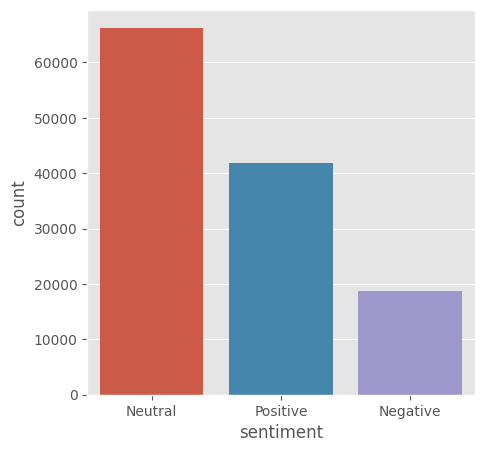

In [62]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

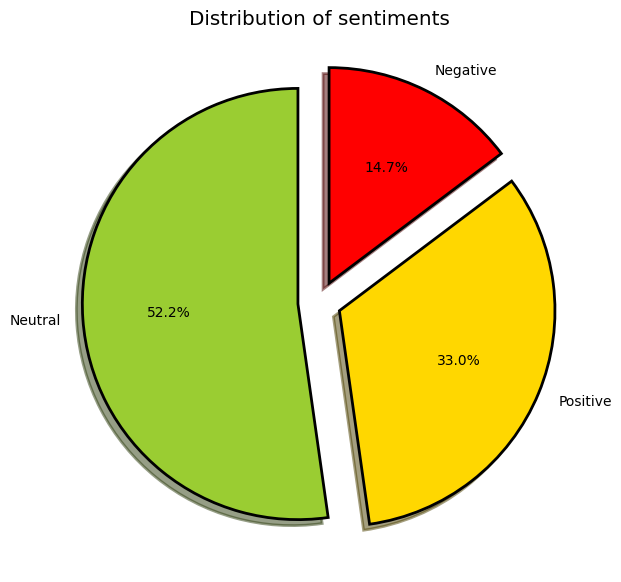

In [64]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [66]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
78115,tryna choose baby names group chat baby names ...,1.0,Positive
63112,fridayvelvet best scene woo,1.0,Positive
28711,believe call prayer proclaimed friday hasten e...,1.0,Positive
145218,kristin67377787 wishing best luck finding works,1.0,Positive
28672,sexysposlover best whiff tre diggs 7 cowboys k...,1.0,Positive


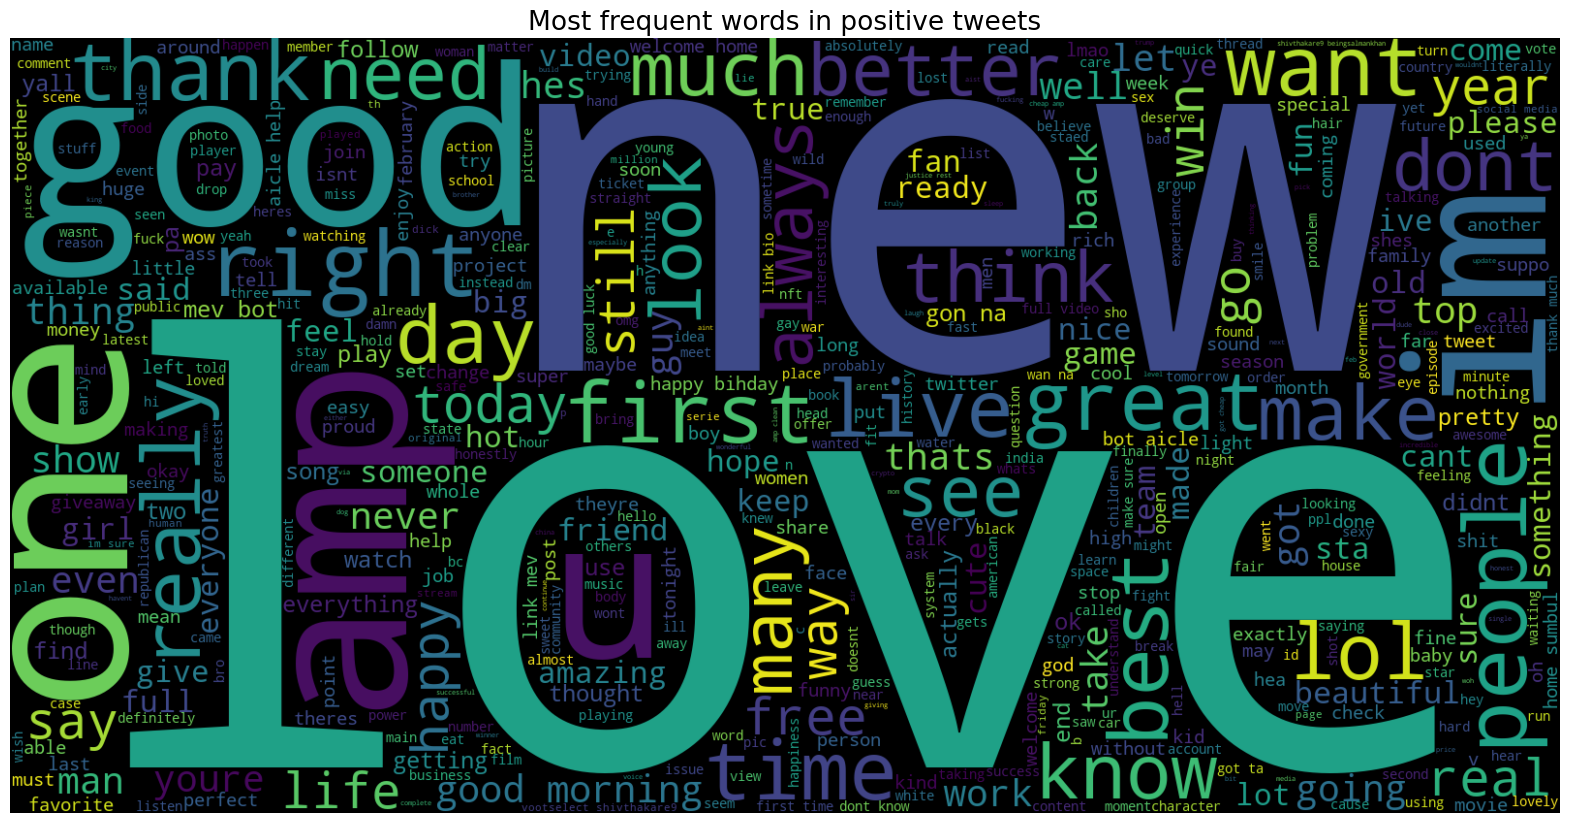

In [67]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [69]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
28883,itsghostlol discord bio full videos porn moani...,-6.938894e-18,Negative
15988,dont want super vulnerable main feel like some...,-6.938894e-18,Negative
99349,top bottom photo us government camp near darie...,-7.930164e-18,Negative
3123,ok iowa ballin hard first half maryland ncaawb...,-1.110223e-17,Negative
8328,junior sma good shes sitting getting hair done...,-1.387779e-17,Negative


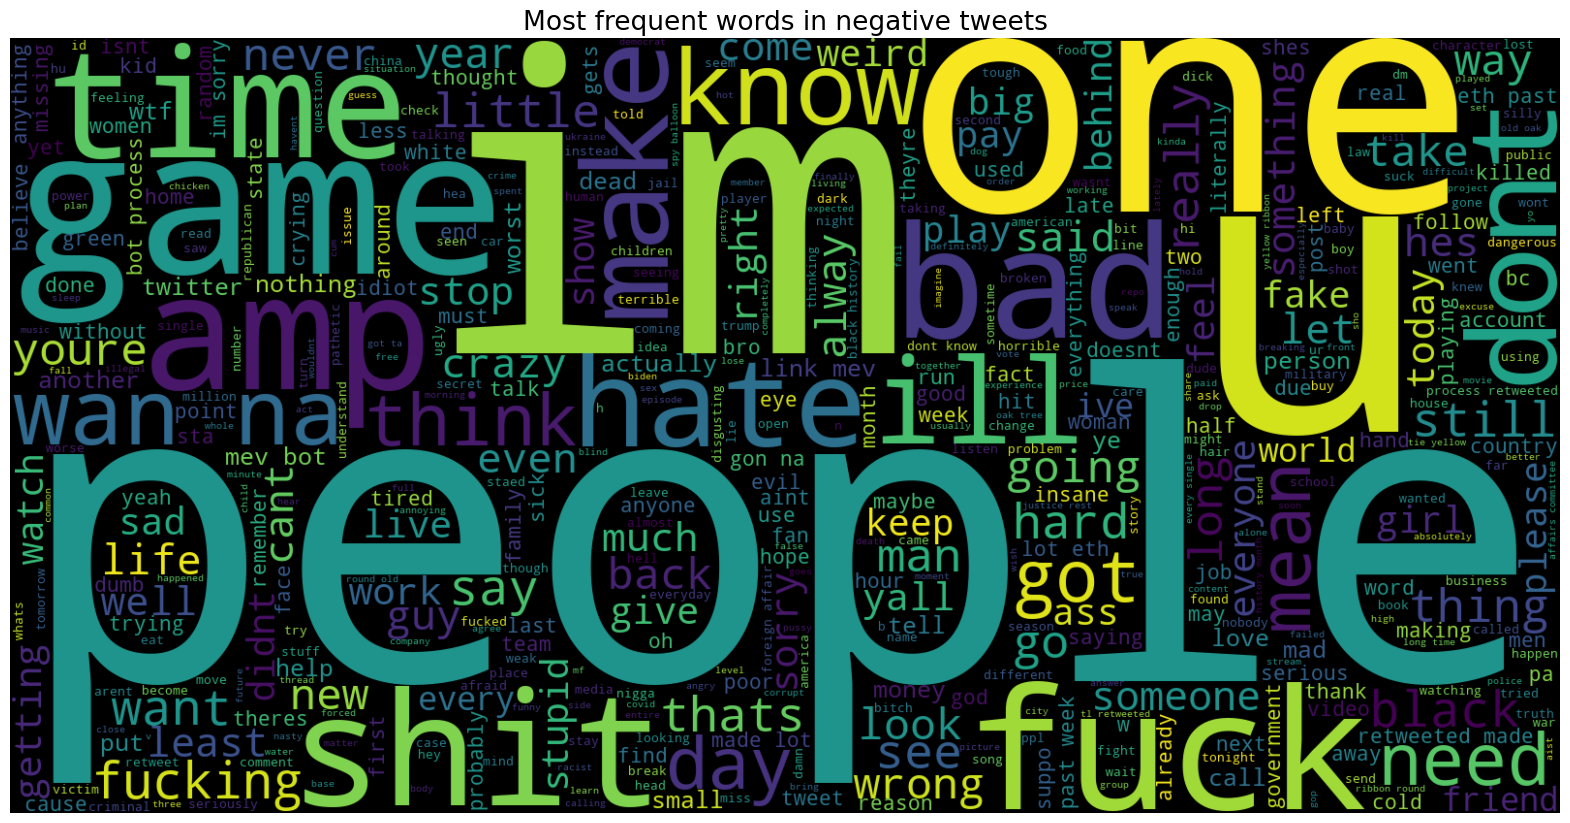

In [70]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [71]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,__theseyram go,0.0,Neutral
101080,painchek vcare dont let oppounity slip away re...,0.0,Neutral
101025,dillonmyleedwinared 葫芦岛 长乐 临沧,0.0,Neutral
101028,davidkadari2 andrewkschlecht downtodunk mffl_e...,0.0,Neutral
101032,godbody_rfi accuracy,0.0,Neutral


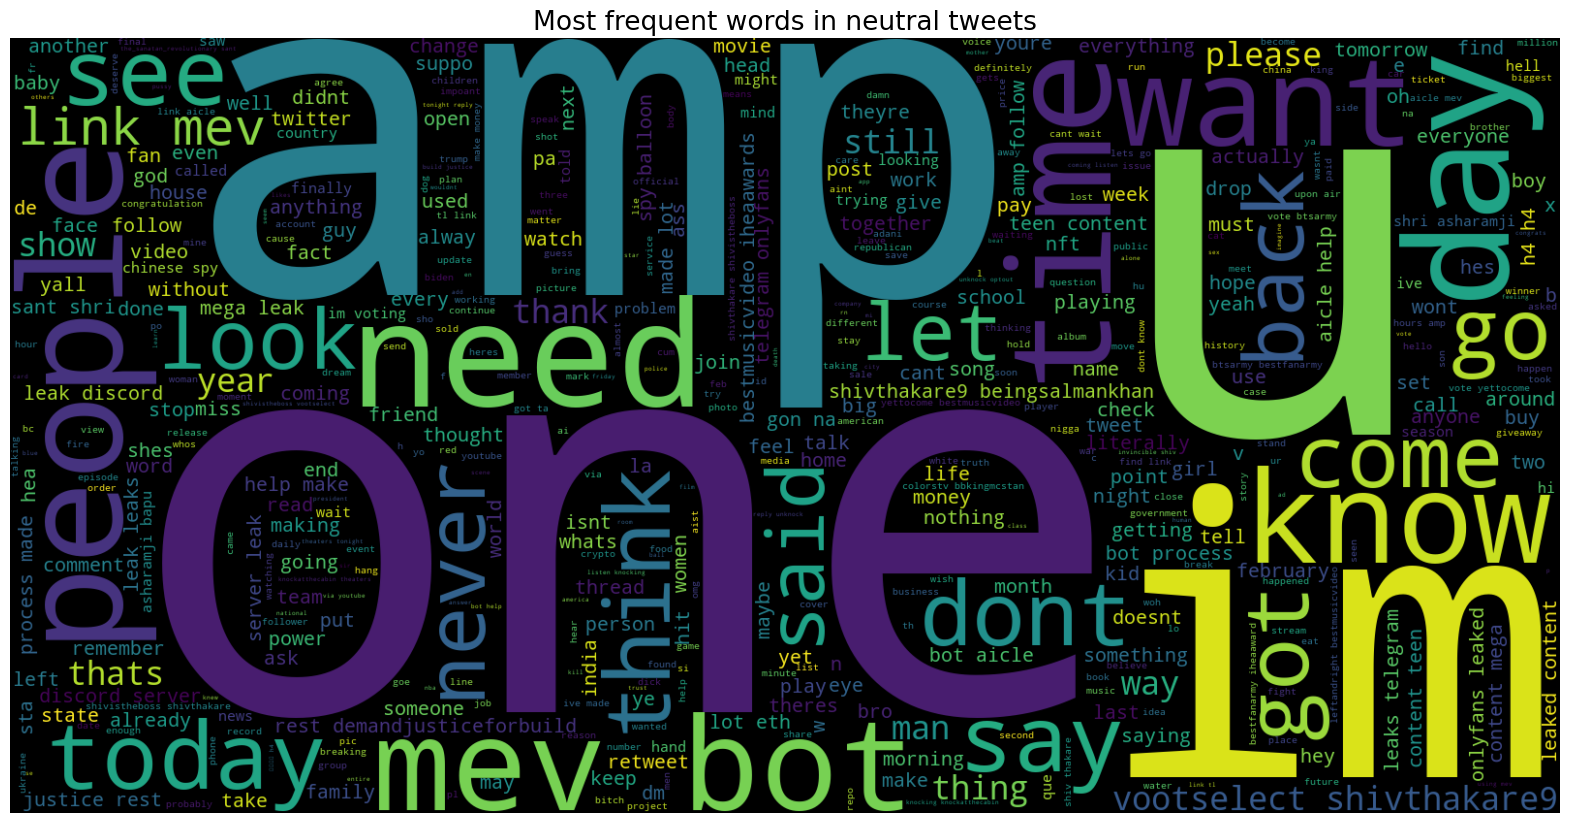

In [72]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [73]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])

In [75]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 1008336

First 20 features:
 ['00' '00 676' '00 ft' '00 humidity' '00 minyshelby' '00 mm' '00 mmhr'
 '00 mph' '00 ms' '00 pips' '00 rain' '00 snow' '00 wind' '000'
 '000 barometer' '000 following' '000 hurry' '000 look' '000 migrant'
 '000 per']


In [76]:
X = df['text']
Y = df['sentiment']
X = vect.transform(X)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (101387, 1008336)
Size of y_train: (101387,)
Size of x_test: (25347, 1008336)
Size of y_test: (25347,)


In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.45%


In [81]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 3019   443   256]
 [   57 13098    49]
 [  166   436  7823]]


              precision    recall  f1-score   support

    Negative       0.93      0.81      0.87      3718
     Neutral       0.94      0.99      0.96     13204
    Positive       0.96      0.93      0.95      8425

    accuracy                           0.94     25347
   macro avg       0.94      0.91      0.93     25347
weighted avg       0.94      0.94      0.94     25347



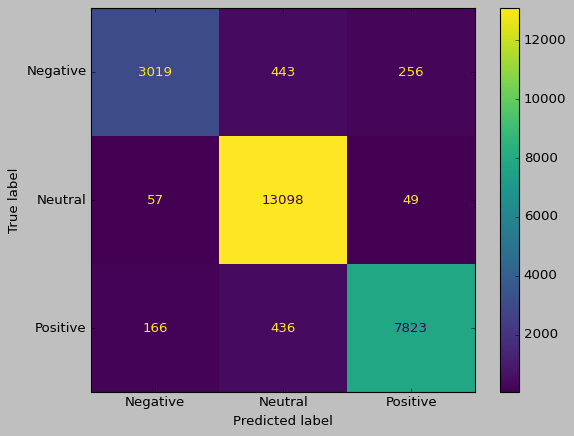

In [82]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [85]:
GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [86]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [87]:
y_pred = grid.predict(x_test)

In [88]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.37%


In [89]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3148   328   242]
 [   58 13099    47]
 [  158   341  7926]]


              precision    recall  f1-score   support

    Negative       0.94      0.85      0.89      3718
     Neutral       0.95      0.99      0.97     13204
    Positive       0.96      0.94      0.95      8425

    accuracy                           0.95     25347
   macro avg       0.95      0.93      0.94     25347
weighted avg       0.95      0.95      0.95     25347



In [90]:
from sklearn.svm import LinearSVC

In [91]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [92]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 96.02%


In [93]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 3236   239   243]
 [   57 13100    47]
 [  156   267  8002]]


              precision    recall  f1-score   support

    Negative       0.94      0.87      0.90      3718
     Neutral       0.96      0.99      0.98     13204
    Positive       0.97      0.95      0.96      8425

    accuracy                           0.96     25347
   macro avg       0.96      0.94      0.95     25347
weighted avg       0.96      0.96      0.96     25347



In [94]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [95]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [96]:
y_pred = grid.predict(x_test)

In [97]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.07%


In [98]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3245   232   241]
 [   58 13100    46]
 [  162   258  8005]]


              precision    recall  f1-score   support

    Negative       0.94      0.87      0.90      3718
     Neutral       0.96      0.99      0.98     13204
    Positive       0.97      0.95      0.96      8425

    accuracy                           0.96     25347
   macro avg       0.96      0.94      0.95     25347
weighted avg       0.96      0.96      0.96     25347

